# Session 1

# Sampling and reconstruction

Most signals of practical interest, such as speech, biometrics, audio and video are effectively analog (continuous).

For intelligent systems to process such signals, they must be converted into a digital form where they are represented by a sequence of numers with finite precision. This conversation can be obtained by sampling the continuous signal at discrete time instants. With uniform (periodic) sampling, there is a fixed  time interval between samples, $T$, called the sampling period. The reciprocal of $T$, $F_s = \frac{1}{T}$, is called the sampling rate (or sampling frequency in hertz).

Let $x_a(t)$ be the analog function for a signal at time $t$, while $x_d(n)$ is the digital signal sampled from $x_a$.  Assuming that sample $n=0$ is collected at $t=0$, the n'th sample will have the value $x_d(n) = x_a(nT)$.

A simple continious-time signal is the harmonic oscillation, that is described by the sinusoidal (sine wave) curve:

$$ x_a(t) = A\sin(\Omega\, t+\theta), $$

where $A$ is the amplitude of the sinusoid, $\Omega$ is the angular frequency (in radians per second), and $\theta$ is the phase (in radians). It is often preferred to define the frequency $F$ in cycles per second (hertz) such that $\Omega = 2\pi F$:

$$ x_a(t) = A\sin(2\pi F\, t +\theta)$$

The discrete signal obtained with a sampling frequency $F_s = \frac{1}{T}$ is:

$$ 
x_d(n) = A \sin\left(2\pi\frac{F}{F_s}n + \theta\right)
$$

### The sampling theorem

Notice, that if the frequency of a signal is $F' = F+kF_s$ for some integer $k$, the discrete signal becomes:

$$
x'_d(n) = A\sin\left(2\pi\frac{F+kF_s}{F_s}n + \theta\right)  = A\sin\left(2\pi\frac{F}{F_s}n + 2\pi k n +\theta\right) = A\sin\left(2\pi\frac{F}{F_s}n + \theta\right)
$$

Such frequencies, $F'$, are called aliases of the frequence $F$ for a given sampling rate $F_s$, as we effectively see that we cannot distinguish between the functions  $x'_d(n) = x_d(n)$. The Shannon-Nyquist sampling theorem states that the contininuous signal can only be properly sampled when the sampling frequency is at least twice the frequency of the signal, ie. $F_s > 2F$. The Nyquist rate is then defined as $F_n = 2 F$.


### $\star$ Reconstruction of signals

A properly sampled continuous-time sinusoidal signal can be reconstructed from the samples using the sinc interpolation formula: $$x_a(t) = \sum_{n=-\infty}^{\infty} x_d(n) \text{sinc}\left( \dfrac{t-nT}{T}\right),$$
where $x_d(n)$ is the sampled value for the $n$'th sample, where it is assumed that the sample is collected at time $nT$, with sample $n=0$ collected at $t=0$.
Here, the normalized cardinale sine function is defined  as: $\text{sinc}(x) = \frac{\sin(\pi x)}{\pi x} $, with $x\neq 0$ and $\text{sinc}(0) = 1$. In python the sinc function is available as $\texttt{np.sinc}$. 

In order to reconstruct the signal perfectly, the formula assumes that data is collected on the entire span of the signal domain, which in practice is of course not possible. However, as we will see in the exercises, for limited data the signal can still be approximated for the time interval where data is present. 


### Basically: 

- (Audio) Signals are most often represented as sums of sine waves, each with a given amplitude $A$, frequency $F$ and phase $\theta$
- Since computers and electrical devices (most often) work on a discrete time scale, we **have** to sample the analog signals at discrete time intervals
  - The time between each sample is denoted $T$
  - Often we use the inverse of this $F_s = \frac{1}{T}$ to denote the sampling in **Hertz** (samples per second)
  - When we use sampling to get a digital signal from an analog one, we can only discern different frequencies up to the **nyquist rate**: $2F_s$
    - An example would be a signal with a max frequency of $F_{max} = 10000$, if we sample with a frequency of $F_s = 5000$, we would expect to see other, lower frequencies that aren't actually present (aliases) in the resulting digital signal
- If sampled correctly, all the frequencies of a given signal can be recovered, no matter how they are mixed together 

### Exercise 0 - Prelude

(You can skip this if you have experience with audio signals and such)

*Just to hammer home some intuition behind sine waves and such, we start out light by showing how different sine waves sound when layered on top of each other. The below code generates a sum of sine waves from a list of frequencies, amplitudes and phases. It then samples said sine waves digitially and plays it back while also plotting the time domain representation and the frequency domain representation (after fourier transform)*

**1. Initially, the code creates two different sine waves layered on top of each other, play see if you can discern them from each other both in the sound and in the resulting plots**

**2. Normal human speech sits around 90 - 3500 hz range. Play around with layering more sine waves with different frequencies on top of each other, can you make something that doesn't sound annoying to listen to?**

**3. Try changing the sample_rate, three examples are already presented. See if you can provoke aliasing and see its effects both in the time domain, and in the noise played**

In [2]:
import numpy as np
import sounddevice as sd # Needed to play sounds
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq # Technically used here is the fast fourier transform because it is... fast, don't convern yourself with this


In [3]:
def play_sine_wave(frequencies, amplitudes, phases, duration, sample_rate=44100):
    """
    Play a sine wave generated as as um of given frequencies, amplitudes and phases for a given duration with a givne sample rate

    Args:
        frequencies (list[int]): List of frequencies in the signal
        amplitudes (list[int]): List of amplitudes of each distinct frequency in the signal
        phases (list[int]): List of phases in the signal (in radians)
        duration (int): How long to play the sound
        sample_rate (int, optional): F_s, sample rate to digitally sample the signal, might remove frequencies if too low. Defaults to 44100.
    """
    # Generate sine wave
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    wave = sum([amplitudes[i] * np.sin(2 * np.pi * frequencies[i] * t + phases[i]) for i in range(len(frequencies))])

    sd.play(wave, samplerate=sample_rate)
    # Wait for the sound to finish
    sd.wait()


def plot_sine_wave(frequencies, amplitudes, phases, duration=None, sample_rate=200):
    """
    Plot a sine wave generated as as um of given frequencies, amplitudes and phases for a given duration with a givne sample rate

    Args:
        Same as play_sine_wave, lmao
        If duration is none, will automatically figure out duration from max frequency so you can actually see the frequencies
        This might lead to *some* aliasing in the plots themselves
    """
    # Create duration of signal if not already there
    if not duration:
        duration = 100 / max(frequencies)

    # Generate sine wave
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    wave = sum([amplitudes[i] * np.sin(2 * np.pi * frequencies[i] * t + phases[i]) for i in range(len(frequencies))])
    
    # Frequency domain (FFT)
    N = len(wave)
    yf = fft(wave)
    xf = fftfreq(N, 1 / sample_rate)
    # Only take the positive half of the spectrum
    idx = np.arange(N // 2)

    # Plot
    plt.figure(figsize=(12, 6))
    
    # Time domain plot
    plt.subplot(2, 1, 1)
    plt.plot(t, wave)
    plt.title(f"Sine Wave in Time Domain (Frequencies = {frequencies} Hz)")
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")
    plt.grid(True)

    # Plot frequency domain
    plt.subplot(2, 1, 2)
    plt.plot(xf[idx], 2.0 / N * np.abs(yf[idx]))  # Normalized magnitude
    plt.title(f"Sine Wave in Frequency Domain (Frequency = {frequencies} Hz)")
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Magnitude")
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()


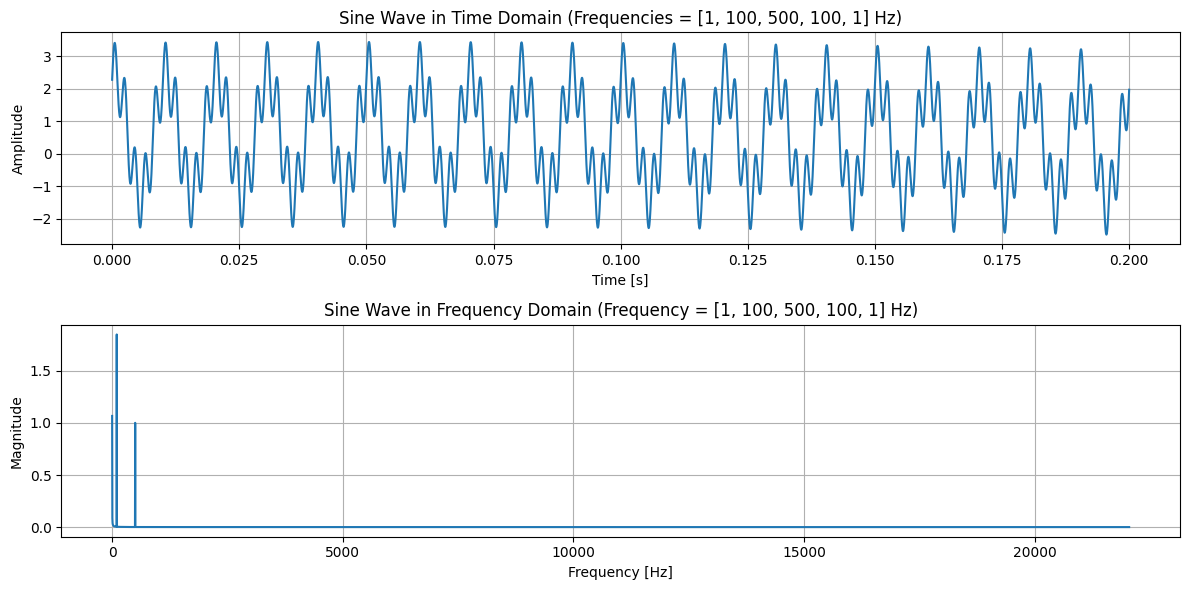

In [31]:
frequencies = [1, 100, 500, 100, 1] # Change this
amplitude = [1, 1, 1, 1, 1] # Change this
phases = [0, 90*np.pi/180, 0, 45*np.pi/180, 145*np.pi/180] # Change this, remember, the  is in radians

sample_rate = 44100 # Example of normal sampling rate for computers: 44.1 Khz

# sample_rate = 2 * max(frequencies) # Example of 'almost good enough sampling rate' 2*nyquist rate
# sample_rate = 1000 # Example of bad sampling rate - insufficient to capture all frequencies


play_sine_wave(frequencies=frequencies, amplitudes=amplitude, phases=phases, duration=2, sample_rate=sample_rate)
plot_sine_wave(frequencies=frequencies, amplitudes=amplitude, phases=phases, duration=None, sample_rate=sample_rate)


### Exercise 1 - Sampling with the Nyquist rate

Let two analog signals $x_{a1}$ and $x_{a2}$ be described by individual harmonic oscillators, such that:

- $x_{a1}(t)$ has amplitude $A_1 = 1$, frequency $F_1 = \frac{1}{8}$ and  phase $\theta_1 = 0$
- $x_{a2}(t)$ has amplitude $A_2 = 1$, frequency $F_2 = \frac{7}{8}$ and  phase $\theta_2 = \pi$. 

**1. For both signals, what is the minimum sampling rate (Nyquist rate) to avoid aliasing?**  
$F_n=2*F_1=2/8=1/4$  
$F_n=2*F_2=14/8=7/4$

**2. For both signals, what is the discrete signal obtained with the sampling rate $F_s = 3$ hertz?**
$$x_{d}(n)=x_{a}(n\times T_s)=A\times sin(2\pi F \frac{n}{F_s} + \theta)$$
$x_{d1}(n) = sin(2\pi \frac{1}{8} \frac{n}{3 \text{ hertz}})$  
$x_{d2}(n) = sin(3\pi \frac{7}{8} \frac{n}{3 \text{ hertz}})$

Whenever we sample, it will always be a discrete signal. The sampling rate given is above both the minimum sampling rates for both signals, which is why this sampling rate is adequate.

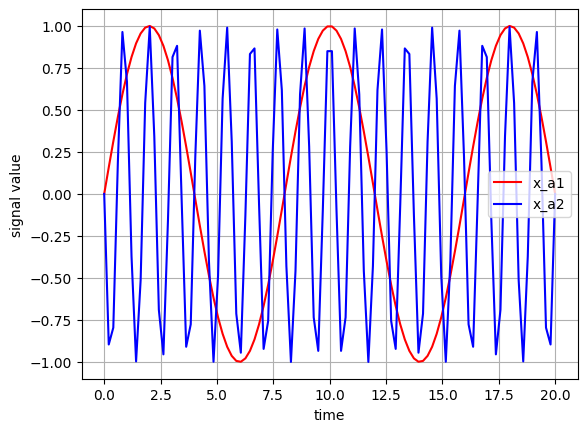

In [33]:
# Function that simulates harmonic oscillator
# Notice that 'time' is a vector (array) of time=points
def sine_wave_function(time, amplitude, frequency, phase):
    signal = amplitude*np.sin(2*np.pi*frequency*time + phase)
    return signal

# Define the signal parameters for x_a1 and x_a2
amplitude_1 = 1
signal_frequency_1 =  1/8
amplitude_2 =  1
signal_frequency_2 =  7/8
phase_1 =  0
phase_2 =  np.pi
    

# Plot signals x_a1 and x_a2

N = 100
init_point = 0
end_point = 20
time = np.linspace(init_point, end_point, N)
x_a1 = sine_wave_function(time, amplitude_1, signal_frequency_1, phase_1)
x_a2 = sine_wave_function(time, amplitude_2, signal_frequency_2, phase_2)
plt.plot(time, x_a1, color='red', label='x_a1')
plt.plot(time, x_a2, color='blue', label='x_a2')
plt.xlabel('time')
plt.ylabel('signal value')
plt.legend()
plt.grid()
plt.show()


**3. Verify from the plot that $x_{a1}$ is an alias for $x_{a2}$ when the sample frequency is $1$ hertz. You can for instance sample both signals with $F_s = 1$ and plot the sample points in the same figure as the waves. You can use the code below as a template to do this.**

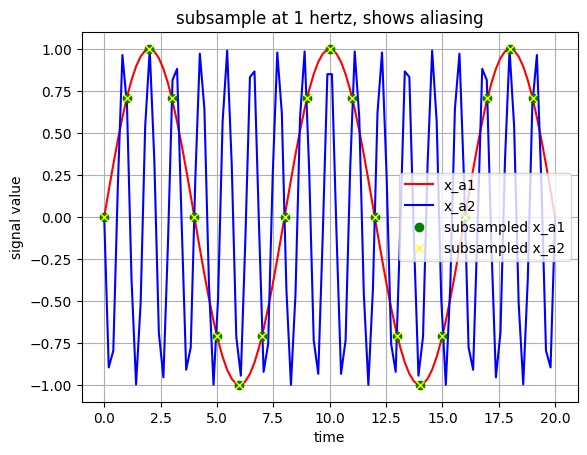

In [46]:
#Verify that x_a1 is an alias for x_a2 when sampled at 1 hertz,
#we sample x_a1 and x_a2 at 1 hertz and plot the sample-values

subsampling_frequency = 1
sampled_time = np.arange(init_point, end_point, 1/subsampling_frequency)
subsampled_signal_x_a1 = sine_wave_function(sampled_time, amplitude_1, signal_frequency_1, phase_1)
subsampled_signal_x_a2 = sine_wave_function(sampled_time, amplitude_2, signal_frequency_2, phase_2)

plt.plot(time, x_a1, color='red', label='x_a1')
plt.plot(time, x_a2, color='blue', label='x_a2')
plt.plot(sampled_time, subsampled_signal_x_a1, 'o',color='green', label='subsampled x_a1')
plt.plot(sampled_time, subsampled_signal_x_a2, 'x',color='yellow', label='subsampled x_a2')
plt.legend()
plt.grid()
plt.title('subsample at 1 hertz, shows aliasing')
plt.xlabel('time')
plt.ylabel('signal value')
plt.show()

### $\star$ Exercise 2 - Reconstruction of Signals

*The below code implements two functions used to perform interpolation.*

**1. Inspect the code and see how it approximates the reconstruction given by the sinc interpolation formula.  Notice how the reconstructed value at time $t$ is based on all $N$ data points as $$x_r(t) = \sum_{n=0}^{N-1} x(n) \text{sinc}\left( \dfrac{t-nT}{T}\right)$$
where $x(n)$ is the sampled value for the $n$'th sample, when it is assumed that the sample is collected at time $nT$, with sample $n=0$ collected at $t=0$.**

*$\star$ For different sampling frequencies, the code samples the signal $x_{a2}$ and plot the sample points together with the wave function. Also, the interpolation function is used to reconstruct the signal from data and plot the reconstructed signal.*

**2. Try different sampling frequencies, both below and above the Nyquist rate. For instance you can try $F_s = 1$, $F_s = 3$ and $F_s = 0.75$. Compare and comment on your experiments.**

**3. For $F_s = 1$ verify that the reconstruction is the alias $x_{a1}$.**

**4. Uncomment a line to, try to use linear interpolation instead of sinc interpolation. Comment on what sampling rate you then need for the reconstructed wave to look 'smooth'?**

**5. For both sinc and linear interpolation, investigate what happens if you try to reconstruct the signal outside the time range supported by the sampled data.**

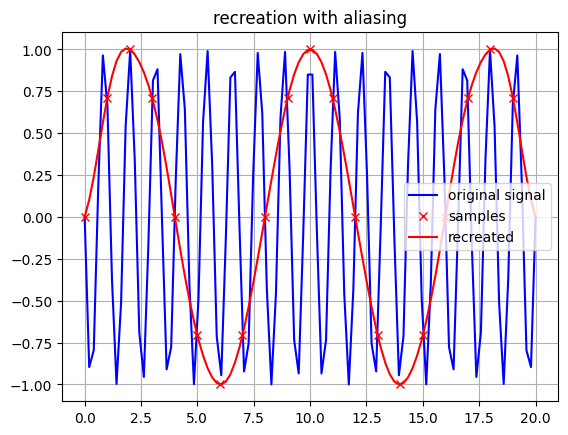

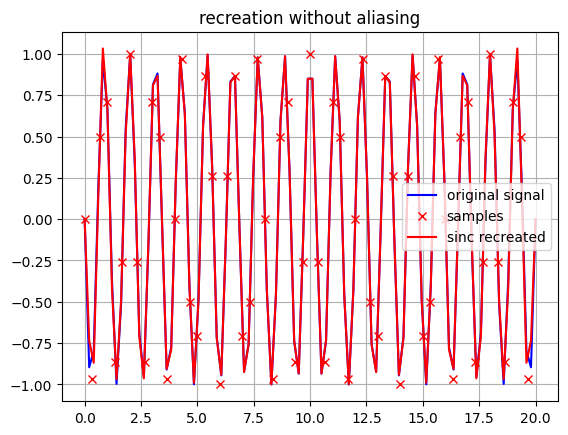

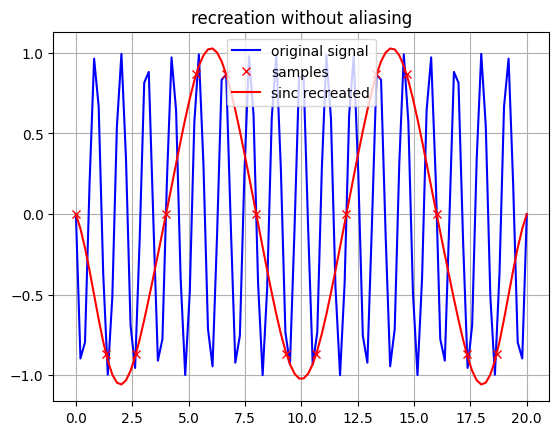

In [50]:
#reconstruct signal from samples using sinc interpolation

#function for reconstructing siganal at a single time point
def sinc_interpolate_one_value(sampled_signal, period, new_t):
    T = period
    new_y = 0
    for n in range(len(sampled_signal)):
        new_y += sampled_signal[n] * np.sinc((1/T)*(new_t-n*T))
    return new_y

#function for performing sinc interpolation
#sampled_signal: the sampled values
#period: the subsampling period 'T'
#new_times: new time points, used to reconstruct the signal 
#           (use a high number to create a smooth signal)
def sinc_interpolation(sampled_signal, period, new_times):
    reconstruced_values = []
    for t in new_times:
        reconstruced_values.append(sinc_interpolate_one_value(sampled_signal, period, t))
    return np.array(reconstruced_values)

#function for subsampling x_a2
def subsampling_x_a2(sampling_frequency):
    subsampling_frequency = sampling_frequency
    sampled_time = np.arange(init_point, end_point, 1/subsampling_frequency)
    subsampled_signal_x_a2 = sine_wave_function(sampled_time, amplitude_2, signal_frequency_2, phase_2)
    return subsampled_signal_x_a2, sampled_time


frequency_1hertz = 1
period_1hertz = 1.0/frequency_1hertz
sample_1hertz, time_1hertz = subsampling_x_a2(frequency_1hertz)
recreated_1hertz = sinc_interpolation(sample_1hertz,period_1hertz,time)
plt.plot(time, x_a2, color='blue', label='original signal')
plt.plot(time_1hertz, sample_1hertz, 'rx', label = 'samples')
plt.plot(time, recreated_1hertz, 'r-', label = 'recreated')
#remove comment to show linear interpolation
#plt.plot(time_1hertz, sample_1hertz, 'g-', label = 'linear recreated') #show linear interpolation
plt.legend()
plt.title('recreation with aliasing')
plt.grid()
plt.show()

frequency_3hertz = 3
period_3hertz = 1.0/frequency_3hertz
sample_3hertz, time_3hertz = subsampling_x_a2(frequency_3hertz)
recreated_3hertz = sinc_interpolation(sample_3hertz,period_3hertz,time)
plt.plot(time, x_a2, color='blue', label='original signal')
plt.plot(time_3hertz, sample_3hertz, 'rx', label = 'samples')
plt.plot(time, recreated_3hertz, 'r-', label = 'sinc recreated')
plt.legend()
plt.title('recreation without aliasing')
plt.grid()
plt.show()

# Add new frequency
frequency_075hertz = 0.75
period_075hertz = 1.0/frequency_075hertz
sample_075hertz, time_075hertz = subsampling_x_a2(frequency_075hertz)
recreated_075hertz = sinc_interpolation(sample_075hertz,period_075hertz,time)
plt.plot(time, x_a2, color='blue', label='original signal')
plt.plot(time_075hertz, sample_075hertz, 'rx', label = 'samples')
plt.plot(time, recreated_075hertz, 'r-', label = 'sinc recreated')
plt.legend()
plt.title('recreation without aliasing')
plt.grid()
plt.show()

#remove comment to show linear interpolation
#plt.plot(time_3hertz, sample_3hertz, 'g-', label = 'linear recreated') #show linear interpolation



# Orthonormal periodic basis functions

*The purpose of this exercise is to familarize yourself with orthonormal periodic basis functions. Let us consider signals sampled on the interval $n \in [0,N-1]$. The **fundamental frequency** functions are given by*


$$f_1(n) = \frac{\sqrt{2}}{\sqrt{N}}\cos \left( 2\pi \frac{1}{N}n \right)  $$

$$g_1(n) = \frac{\sqrt{2}}{\sqrt{N}}\sin \left( 2\pi \frac{1}{N}n \right)  $$

These are periodic with $f_1(n+N)=f_1(n), \ g_1(n+N)=g_1(n)$. 

The **higher harmonics** are given by

$$f_k(n) = \frac{\sqrt{2}}{\sqrt{N}}\cos \left(2\pi  \frac{k }{N}n \right) $$

$$g_k(n) = \frac{\sqrt{2}}{\sqrt{N}}\sin \left(2\pi  \frac{k }{N}n \right)  $$

*These are periodic with $f_k(n+\frac{N}{k})=f(n), \ g_k(n+\frac{N}{k})=g_k(n)$, i.e. their frequencies are $k$ times higher than the fundamental frequency.*

*Recall the constant $\frac{\sqrt{2}}{\sqrt{N}}$ serves to normalize the length of the basis vectors to have unit length.*

*The range of $k$'s is $k=[0,N/2]$ for even $N$ and $k=[0,(N-1)/2]$ for odd. With $k=0$ we get the constant function*

$$f_0(n) = \frac{\sqrt{2}}{\sqrt{N}}\cos \left( \frac{2\pi 0}{N}n \right) = \frac{\sqrt{2}}{\sqrt{N}} $$

*So in total we have precisely $N$ discrete sampled harmonic functions or vectors $\mathbf{v}_n$ if they are visualized as points in $\mathbb{R}^N$.*

*The first vector $\mathbf{v}_0$ is the constant vector:*
$$(\mathbf{v}_0)_n = \frac{\sqrt{2}}{\sqrt{N}}$$

*The vectors $\mathbf{v}_1, \mathbf{v}_3, ...$ are the cosine-vectors and the vectors $\mathbf{v}_2, \mathbf{v}_4, ...$ are the sine-vectors:*

$
\begin{align}
(\mathbf{v}_{2k-1})_n &= f_{k}(n) \\
(\mathbf{v}_{2k})_n &= g_{k}(n) 
\end{align}
$

for $k = 1, 2, ..., N/2$.

*We have a complete orthonormal basis set! We can form a **basis matrix** $\boldsymbol{V}=\left( \mathbf{v}_0 \quad \mathbf{v}_1 \quad \mathbf{v}_2 \quad ... \quad \mathbf{v}_{N-1} \right)^T$ where $\|\mathbf{v}\|=1$.*


### Exercise 3: Changing domains

*We will use the following simulated signal:*

$$f(n) = \cos\left(2\pi \frac{0.15}{fs}\right) + \frac12 \cos\left(2\pi \frac{1}{fs}\right) + \frac{1}{4} \cos\left(2\pi \frac{2}{fs}\right)\tag{1}$$

*However, instead of observing the signal $f(n)$ directly, we assume we only have access to a noisy version of $f$:*

$$y(n) = f(n) + \epsilon_n,\tag{2}$$

where $\epsilon_n \sim \mathcal{N}(0, 0.5^2)$.


 **1. Implement the sampled signal using numpy**

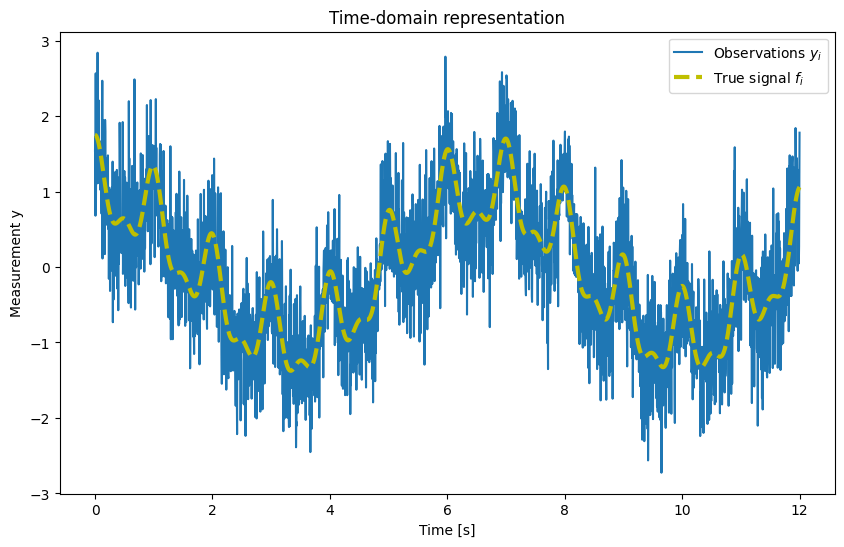

In [2]:
np.random.seed(2)

# length
N = 3001

# sample rate
fs = 250

# time vector
ns = np.arange(N)
ts = ns/fs

# create f
A0 = ... # Amplitudes of each frequnecy in the sampled signal
f0 = ... # Frequencies in the sampled signal

f = np.zeros(N) # Actual values of the sampled signal
for ai, fi in zip(A0, f0):
    
    f += ... # Add the sine wave sample observations
    
# simulate noisy observations
noise = np.random.normal(0, 0.5, size=N)

# Create y, this is our observed, sampled signal that follows a true sine wave
y = f + noise


fig = plt.figure(figsize=(10, 6))
plt.plot(ts, y, label='Observations $y_i$')
plt.plot(ts, f, 'y--', linewidth=3, label='True signal $f_i$')
plt.xlabel('Time [s]')
plt.ylabel('Measurement y')
plt.title('Time-domain representation')
plt.legend();

**2. Set-up the basis matrix**

In [3]:
# make sure we have an odd number N
def create_basis(N):
    
    assert N % 2 == 1
    
    ns = np.arange(N)
    V = np.zeros((N,N))
        
    # first basis vector
    V[:,0] = np.ones(N)
    
    # remaining basis vectors
    n_pairs = int((N-1)/2)
    for k in range(1,n_pairs + 1):

        # in each column we are going to define cosine or sine function with frequency k. These will be the columns of our basis matrix
        V[:,2*k-1] = ... # This should be a certain cosine wave
        V[:,2*k] = ... # This should be a certain sine wave
    
    # scale all vectors
    V = V/np.sqrt(N)
    return V

*After we have defined our basis matrix $\mathbf{V}$, we can now compute the coordinates of a our signal $\mathbf{y}$ expressed in the basis $\mathbf{V}$:*

$$\mathbf{z} = \mathbf{V}^T \mathbf{y}$$

*Recall that the coefficients of $\mathbf{z}$ is ordered as follows*

$$\mathbf{z} = \left[a_0 \quad a_1 \quad b_1 \quad a_2 \quad b_2 \quad ... a_{K} \quad b_{K}\right]^T$$

where 
$$\begin{align*}
		y(n) &= a_0 + a_1\cos(2\pi \frac{1}{N} n) + b_{1}\sin(2\pi \frac{1}{N} n)+ a_2\cos(2\pi \frac{2}{N} n) + b_{2}\sin(2\pi \frac{2}{N} n) + ...\\
		&= a_0 + \sum_{k=1}^K  \left[a_k\cos(2\pi \frac{k}{N} n) + b_k\sin(2\pi \frac{k}{N} n)\right]\\
		\end{align*}
$$
**3. Compute the coordinates of the signal $\mathbf{y}$ expressed in the basis $\mathbf{V}$**

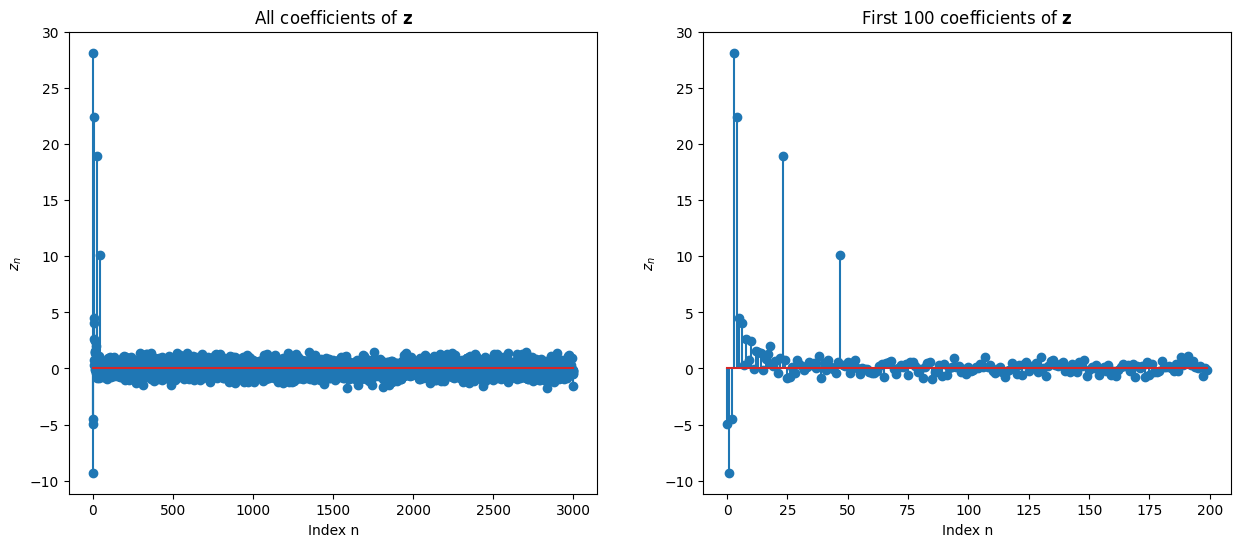

In [4]:
V = create_basis(N)

z = ... # Project the signal y (which we constructed earlier) unto the basis V that we have just made 

plt.figure(figsize=(15, 6))
ax = plt.subplot(1, 2, 1)
plt.stem(z)
plt.xlabel('Index n')
plt.ylabel('$z_n$')
plt.title('All coefficients of $\mathbf{z}$')


plt.subplot(1, 2, 2)
plt.stem(z[:200])
plt.xlabel('Index n')
plt.ylabel('$z_n$')
plt.title('First 100 coefficients of $\mathbf{z}$');


**4. See if you can identify the frequencies of the 'actual' signal vs the frequencies that stem from the noise.**

**5. Does the noise have any different effects for the lower-amplitude frequencies vs the higher-amplitude frequencies?**

### Exercise 4: Computing the energy of the signal

*The energy of a signal from $n=0$ to $N$ is given by*

$$E = \sum_{n=0}^N f(n)^2$$

*We have seen that the energy can be computed in the time-domain as well as in the frequency-domain with the same result.*

 **1. Calculate the energy of the signal in both the time and frequency domains**

In [5]:
# Remember that y is our signal in time domain
# And z is our signal projected unto our frequency basis function (so in frequncy domain)

E_time = ... # energy in time domain
E_freq = ... # energy in frequency domain

print('Energy (time  domain): %3.2f' % E_time)
print('Energy (freq. domain): %3.2f' % E_freq)

Energy (time  domain): 2700.86
Energy (freq. domain): 2700.86


### Exercise 5: Computing the amplitude spectrum


*It is often more convenient to combine the cosine and sine pair for each frequency into a single harmonic function as follows:*

$$
\begin{align*}
		y(n) &= a_0 + \sum_{k=1}^K  c_k \cos\left(2\pi \frac{k}{N} n + \phi_k\right)
		\end{align*},
$$

where $c_k = \sqrt{a_k^2 + b_k^2}$ and $\tan \phi_k = \frac{a_k}{b_k}$.



*Therefore, we will now compute the amplitude spectrum $c_k = \sqrt{a^2_k + b^2_k}$ for $k \geq 1$ and $c_k = a_0$ for $k = 0$, where $a_k$ and $b_k$ are the coefficients for the $k$'th pair of cosine and sine functions, respectively.*

*For convenience we will now define the function ***compute_spectrum***, which takes a signal ***y*** and a matrix function matrix ***V*** and returns the amplitude spectrum*

Text(0.5, 1.0, 'Amplitude spectrum from 0Hz to 10Hz')

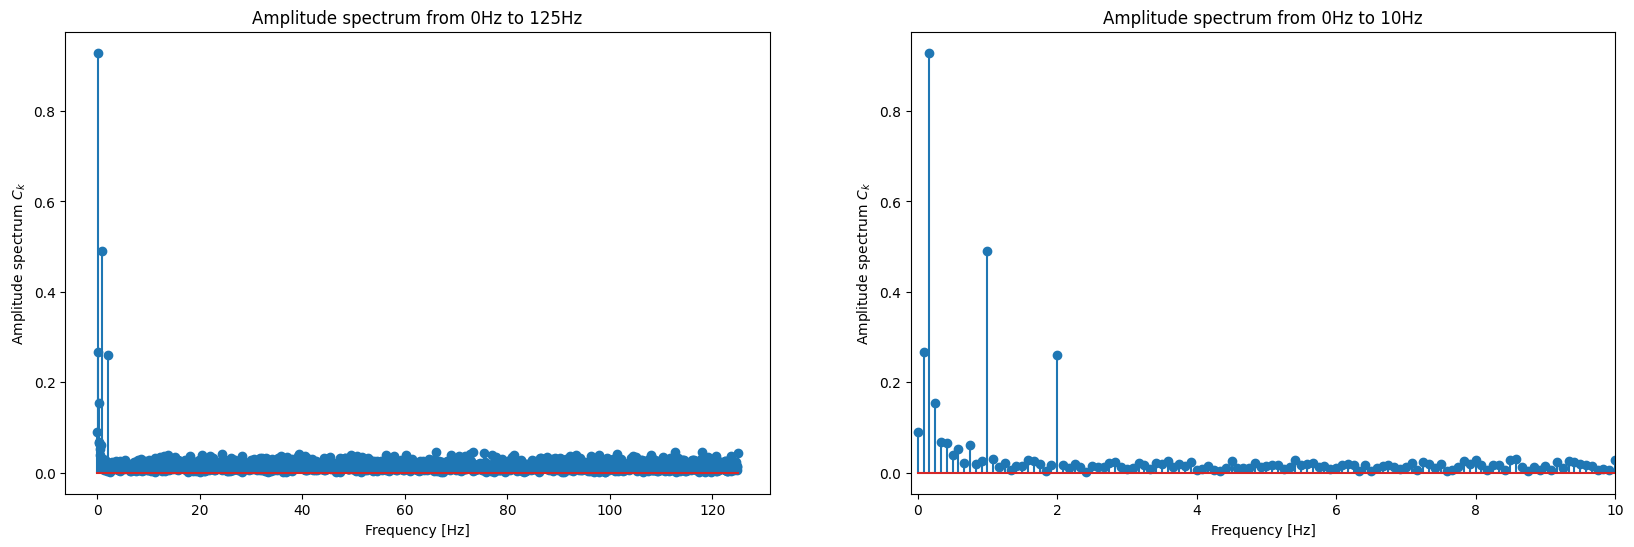

In [6]:
def compute_spectrum(y, V, scale=False):
    z = V.T@y

    z_cos = z[2::2]
    z_sin = z[1::2]
    amp_spectrum = np.sqrt(z_cos**2 + z_sin**2)
    amp_spectrum = np.hstack((np.abs(z[0]), amp_spectrum))
    
    if scale:
        N = len(y)
        scales = np.ones(len(amp_spectrum))
        scales[0] = 1
        scales[1:] = np.sqrt(2)
        
        scales = scales/np.sqrt(N)

        return scales*amp_spectrum
    else:
        return amp_spectrum

freqs = np.arange(int(0.5*N)+1)*fs/N

amplitude_spectrum = compute_spectrum(y, V, scale=True)
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.stem(freqs, amplitude_spectrum)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude spectrum $C_k$')
plt.title('Amplitude spectrum from 0Hz to 125Hz')

plt.subplot(1, 2, 2)
plt.stem(freqs, amplitude_spectrum)
plt.xlim(-0.1, 10)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude spectrum $C_k$')
plt.title('Amplitude spectrum from 0Hz to 10Hz')

*Now let's take the top frequencies and re-construct the signal.*

0.9288487857838614 0.0
0.490222307985725 0.08330556481172942
0.26666074402328394 0.16661112962345884


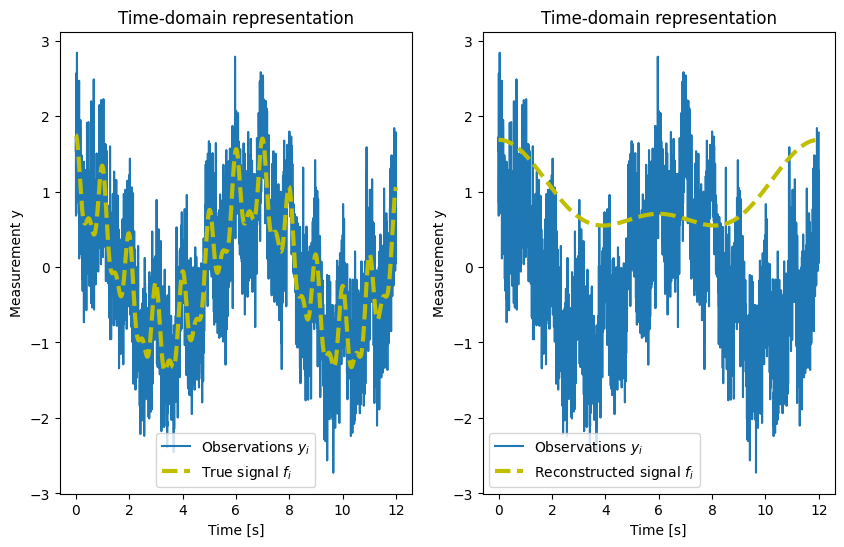

In [25]:
top_n = 3
top_indexes = np.argsort(amplitude_spectrum)[::-1]

A1 = amplitude_spectrum[top_indexes[:top_n]]
freqs_1 = freqs[top_indexes[:top_n]]

f1 = np.zeros(N)
for ai, fi in zip(A1, freqs):
    print(ai, fi)
    f1 += ai*np.cos(2*np.pi*fi/fs*ns)
    

fig = plt.subplots(1, 2, figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(ts, y, label='Observations $y_i$')
plt.plot(ts, f, 'y--', linewidth=3, label='True signal $f_i$')
plt.xlabel('Time [s]')
plt.ylabel('Measurement y')
plt.title('Time-domain representation')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(ts, y, label='Observations $y_i$')
plt.plot(ts, f1, 'y--', linewidth=3, label='Reconstructed signal $f_i$')
plt.xlabel('Time [s]')
plt.ylabel('Measurement y')
plt.title('Time-domain representation')
plt.legend()
plt.show()

*This result is underwhelming, but in week 6 we will see a method which does a significantly better job:)*